## Q2

In [20]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [21]:
x = sp.symbols('x')
func_a = x**(1/3)
func_b = (x**2)*sp.exp(-x)

f_a = sp.lambdify((x), func_a)
f_b = sp.lambdify((x), func_b)

integral_func_a = sp.integrate(func_a, x)
integral_func_b = sp.integrate(func_b, x)

print(integral_func_a, "|" , integral_func_b)
true_integral_f_a = sp.lambdify((x), integral_func_a)
true_integral_f_b = sp.lambdify((x), integral_func_b)

print(f"True Integral f_a : {true_integral_f_a(1) - true_integral_f_a(0)}")
print(f"True Integral f_b : {true_integral_f_b(1) - true_integral_f_b(0)}")

0.75*x**1.33333333333333 | (-x**2 - 2*x - 2)*exp(-x)
True Integral f_a : 0.75
True Integral f_b : 0.16060279414278833


In [22]:
trapezoidal_rule = lambda f, a, b : (f(a) + f(b)) * (b-a)/2

# f_a = lambda x: x**(1/3)
# f_b = lambda x: (x**2)*np.exp(-x)

call_set = set()

def composite_trapezoidal_rule(
        f: callable,
        a: np.float64,
        b: np.float64,
        m: np.int64
):
    integral = 0
    panels = 2**(m)
    h = (b-a)/panels

    for panel in range(1, panels+1):
        integral += trapezoidal_rule(f, (panel-1)*h, panel*h)
        call_set.add(f"f_{(panel-1)*h}")
        call_set.add(f"f_{(panel)*h}")
                     

    return integral

def romberg_integration(f: callable, a: np.float64, b: np.float64, m_upper_limit: int = 50) -> np.ndarray:
    R = np.zeros((m_upper_limit, m_upper_limit))
    
    for m in range(m_upper_limit):
        R[m, 0] = composite_trapezoidal_rule(f, a, b, m)
        for j in range(1, m + 1):
            R[m, j] = ( (4**j) * R[m, j-1] - R[m-1, j-1] ) / ( 4**j - 1 )

        print(abs(R[m, m] - R[m-1, m-1]))
        if m > 0 and abs(R[m, m] - R[m-1, m-1]) < 1e-5:
            return R[:m+1, :m+1]
            
    return R


In [23]:
call_set.clear()
R_f_a = pd.DataFrame(romberg_integration(f_a, 0, 1))
print(f"# unique function evaluations calls {len(call_set)}")
R_f_a 


0.5
0.1958003506560666
0.0348337892932824
0.011865505328313652
0.004541574571933826
0.0017863319246311793
0.0007073345281107812
0.0002805503278568988
0.00011132104658340136
4.417625650809942e-05
1.7531207212484468e-05
6.957249132355514e-06
# unique function evaluations calls 2049


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.646850,0.695800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.708055,0.728457,0.730634,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.733100,0.741448,0.742314,0.742500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.743230,0.746606,0.746950,0.747023,0.747041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.747297,0.748653,0.748790,0.748819,0.748826,0.748828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.748923,0.749465,0.749520,0.749531,0.749534,0.749535,0.749535,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.749572,0.749788,0.749809,0.749814,0.749815,0.749815,0.749815,0.749815,0.000000,0.000000,0.000000,0.000000
8,0.749830,0.749916,0.749924,0.749926,0.749927,0.749927,0.749927,0.749927,0.749927,0.000000,0.000000,0.000000
9,0.749932,0.749967,0.749970,0.749971,0.749971,0.749971,0.749971,0.749971,0.749971,0.749971,0.000000,0.000000


In [24]:
call_set.clear()
R_f_b = pd.DataFrame(romberg_integration(f_b, 0, 1))
print(f"# unique function evaluations calls {len(call_set)}")
R_f_b


0.18393972058572117
0.0215380371050419
0.001791154782689569
7.728568188647422e-06
# unique function evaluations calls 9


,0,1,2,3
0,0.183940,0.000000,0.000000,0.000000
1,0.167786,0.162402,0.000000,0.000000
2,0.162488,0.160722,0.160611,0.000000
3,0.161080,0.160610,0.160603,0.160603


In [25]:
def func_evaluations_romberg(m):
    return 2**m + 1

print("Function eval calls from formula for m = 11:", func_evaluations_romberg(11))
print("Function eval calls from formula for m = 3 : ", func_evaluations_romberg(3))

Function eval calls from formula for m = 11: 2049
Function eval calls from formula for m = 3 :  9


## Q3

In [26]:
# Initialize the LEGENDRE constants

LEGENDRE = {
    2: {
        'roots': [-0.5773502692, 0.5773502692],
        'weights': [1.0, 1.0]
    },
    3: {
        'roots': [-0.7745966692, 0.0, 0.7745966692],
        'weights': [0.5555555556, 0.8888888889, 0.5555555556]
    },
    4: {
        'roots': [-0.8611363116, -0.3399810436, 0.3399810436, 0.8611363116],
        'weights': [0.3478548451, 0.6521451549, 0.6521451549, 0.3478548451]
    },
    5: {
        'roots': [-0.9061798459, -0.5384693101, 0.0, 0.5384693101, 0.9061798459],
        'weights': [0.2369268851, 0.4786286705, 0.5688888889, 0.4786286705, 0.2369268851]
    }
}

yi = lambda xi, a, b : (b+a)/2 + xi*(b-a)/2

def gaussian_quadrature( f: callable, a: np.float64, b: np.float64, m: int) -> np.float64:
    integral = 0
    roots = LEGENDRE[m]['roots']
    weights = LEGENDRE[m]['weights']

    for i in range(len(roots)):
        adjusted_root = yi(roots[i], a, b)
        f_at_root = f(adjusted_root)
        integral += f_at_root * weights[i]

    integral = integral * (b-a)/2

    return integral

In [27]:
gaussian_outputs = pd.DataFrame(data= np.zeros((4,2)), index= (2, 3, 4, 5), columns= ('f(a)', 'f(b)'))

for i in (2, 3, 4, 5):
    gaussian_outputs.loc[i, 'f(a)'] = gaussian_quadrature(f_a, 0, 1, i)
    gaussian_outputs.loc[i, 'f(b)'] = gaussian_quadrature(f_b, 0, 1, i)

gaussian_outputs['#evals'] = gaussian_outputs.index
gaussian_outputs

,f(a),f(b),#evals
2,0.759778,0.159410,2
3,0.753855,0.160595,3
4,0.751946,0.160603,4
5,0.751132,0.160603,5


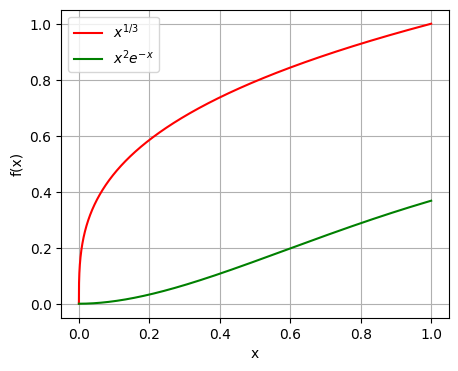

In [39]:
x_values = np.linspace(0,1,10000)
f_a_values = f_a(x_values)
f_b_values = f_b(x_values)

plt.figure(figsize=(5,4))
plt.plot(x_values, f_a_values, label=r'$x^{1/3}$', color = 'red')
plt.plot(x_values, f_b_values, label=r"$x^2 e^{-x}$", color = 'green')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()